# PURPOSE AND OBJECTIVES
<div class="alert alert-block alert-success">


This is a basic exploratory project for data analysis with python by using a dummy dataset. 

The skills demonstrated from this project:<br>
<ul>
    <li>data loading<br>
    <li>data wrangling<br>
    <li>exploratory data analysis<br>
    <li>data model development<br>
    <li>data model evluation <br><br>

</ul>
By the end of this journey, I optained a good idea of the topic, and also be able to predit car price based on attributes such as engine-size.<br> 
Details about the dummy data base: it is a csv file for statisitic of different brand of cars and all the attribute (pricing, number of doors, etc.)

</div>

## Section 5: Model Development
<div class="alert alert-block alert-info">
<b>what I did:</b><br>
Model Evaluation<br>
Overfitting, Underfitting and Model Selection<br>
Ridge Regression<br>
Grid Search<br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv(r'F:\1 art\hard skills\1_computer science\data\3_dummy database\auto\auto_cleaned_df_final.csv')
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,city-L/100km,highway-mpg,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,11.190476,27,8.703704,13495,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,11.190476,27,8.703704,16500,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,12.368421,26,9.038462,16500,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,9.791667,30,7.833333,13950,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,13.055556,22,10.681818,17450,Low,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,19,12.368421,25,9.400000,15250,Low,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,19,12.368421,25,9.400000,17710,Low,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,19,12.368421,25,9.400000,18920,Low,0,1,1,0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,17,13.823529,20,11.750000,23875,Medium,0,1,0,1
9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,23,10.217391,29,8.103448,16430,Low,0,1,1,0


In [11]:
#Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

In [13]:
#Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [14]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>Split data into training and testing data. Place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>

In [16]:
y_data = df['price']

In [18]:
#Drop price data in dataframe x_data:
x_data=df.drop('price',axis=1)

In [19]:
#randomly split data into training and testing data using the function <b>train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


the test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [20]:
#import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

In [23]:
#create a Linear Regression object:
lre=LinearRegression()

In [24]:
# fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [25]:
#calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36339478087886834

In [26]:
#the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

<h2>Cross-Validation Score</h2>

In [27]:
# import model_selection from the module cross_val_score.
from sklearn.model_selection import cross_val_score

In [28]:
#input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [29]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [30]:
# calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522246748197947 and the standard deviation is 0.29176230741826387


In [31]:
#use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20240865.23167852, 43737944.37864215, 12470270.77569642,
       17574447.87971661])

In [32]:
#Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5174371732192354

In [33]:
#use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:
from sklearn.model_selection import cross_val_predict

In [34]:
# input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [35]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [36]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7425.12006788, 28327.02313301, 14210.29915814,  4054.61292262,
       34498.57562361])

In [37]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

In [38]:
#perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\weiwei\AppData\Local\Temp\ipykernel_2912\3249853984.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\weiwei\AppData\Local\Temp\ipykernel_2912\3249853984.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

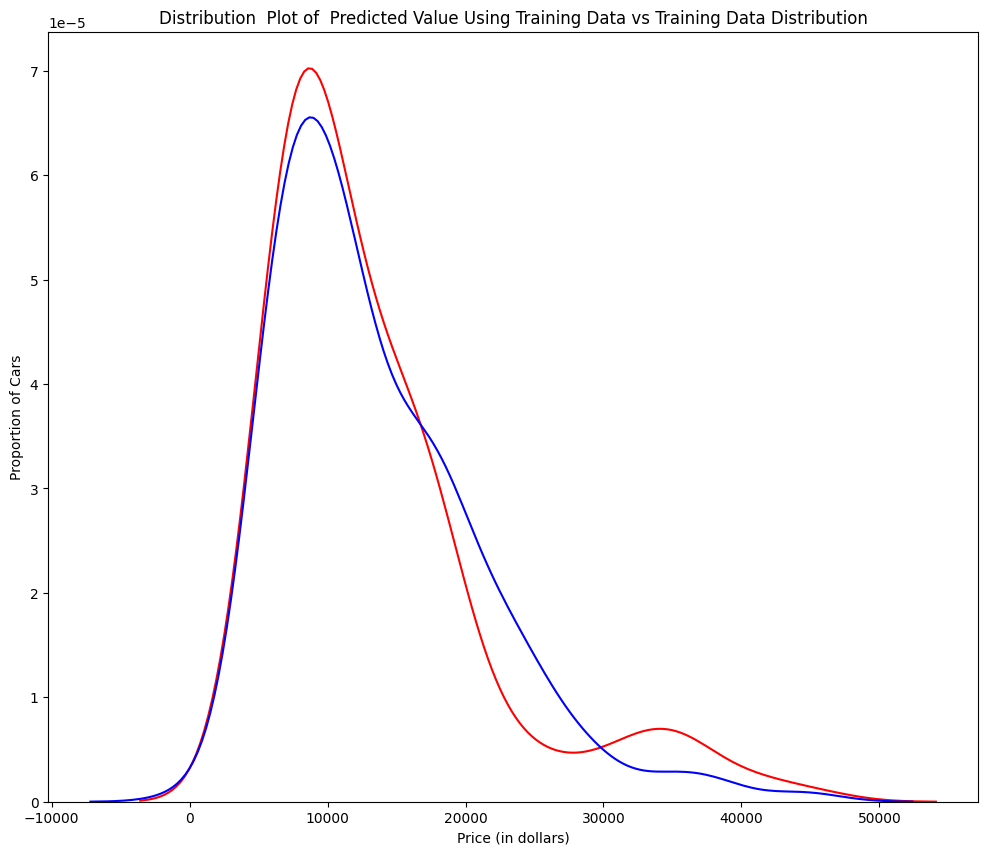

In [39]:
# examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


C:\Users\weiwei\AppData\Local\Temp\ipykernel_2912\3249853984.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\weiwei\AppData\Local\Temp\ipykernel_2912\3249853984.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

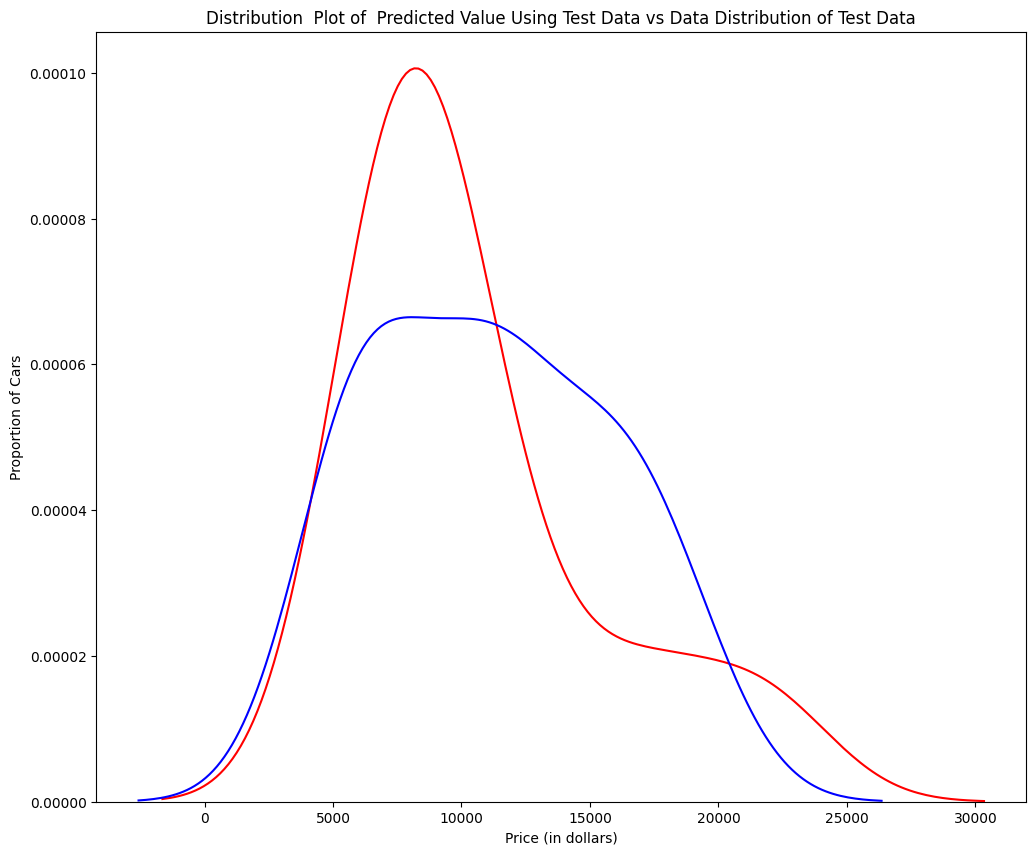

In [41]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.
    
Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [43]:
#use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [44]:
#perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

create a Linear Regression model "poly" and train it.

In [45]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [46]:
# the output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([11981.51262541,  7300.52032537,  9678.260548  ,  8357.28581161,
       15095.93313078])

In [47]:
# take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [11981.51262541  7300.52032537  9678.260548    8357.28581161]
True values: [ 9549  6229 10245  7295]


use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


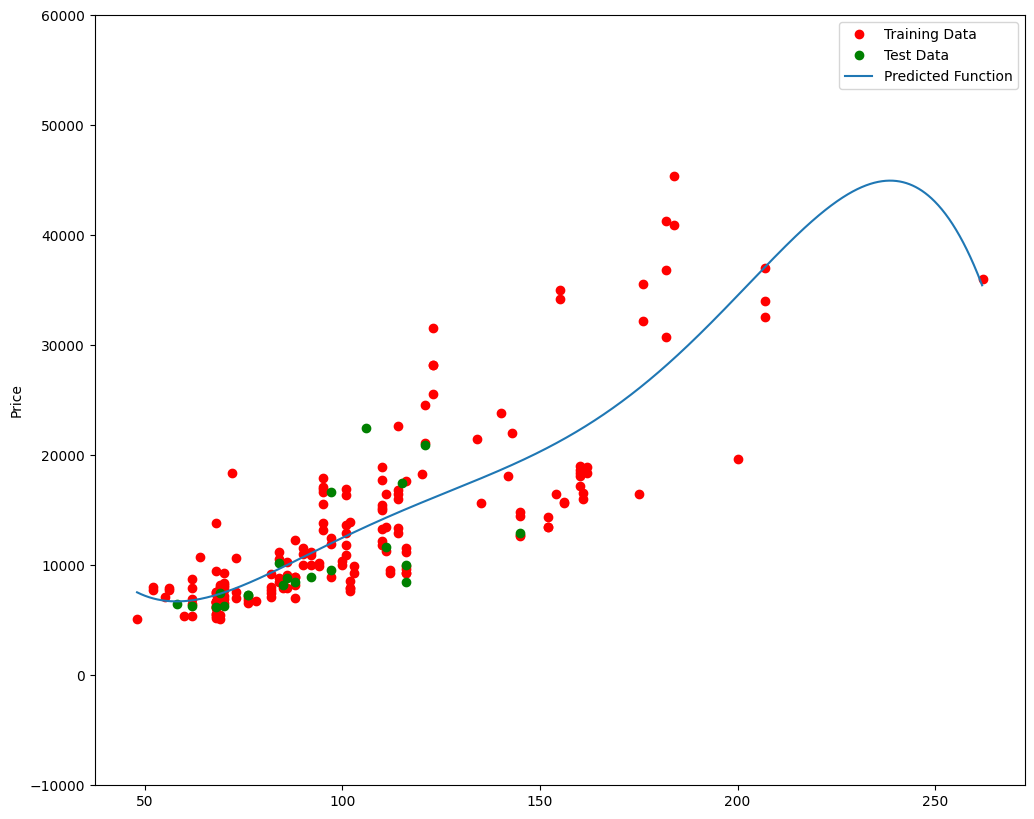

In [48]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


In [50]:
#R^2 of the training data:
poly.score(x_train_pr, y_train)

0.6817753985105167

In [51]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

0.4030198482436995

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

The following function will be used in the next section.


In [55]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [56]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge Regression</h2> 

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

In [59]:
#perform a degree two polynomial transformation on our data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [60]:
# import Ridge from the module linear models.
from sklearn.linear_model import Ridge
# create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)
#fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)
#obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

In [61]:
#compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 9521.06057026  6671.13122957 10530.06515779  5508.87383388]
test set : [ 9549  6229 10245  7295]


select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [62]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:01<00:00, 655.77it/s, Test Score=0.682, Train Score=0.858]


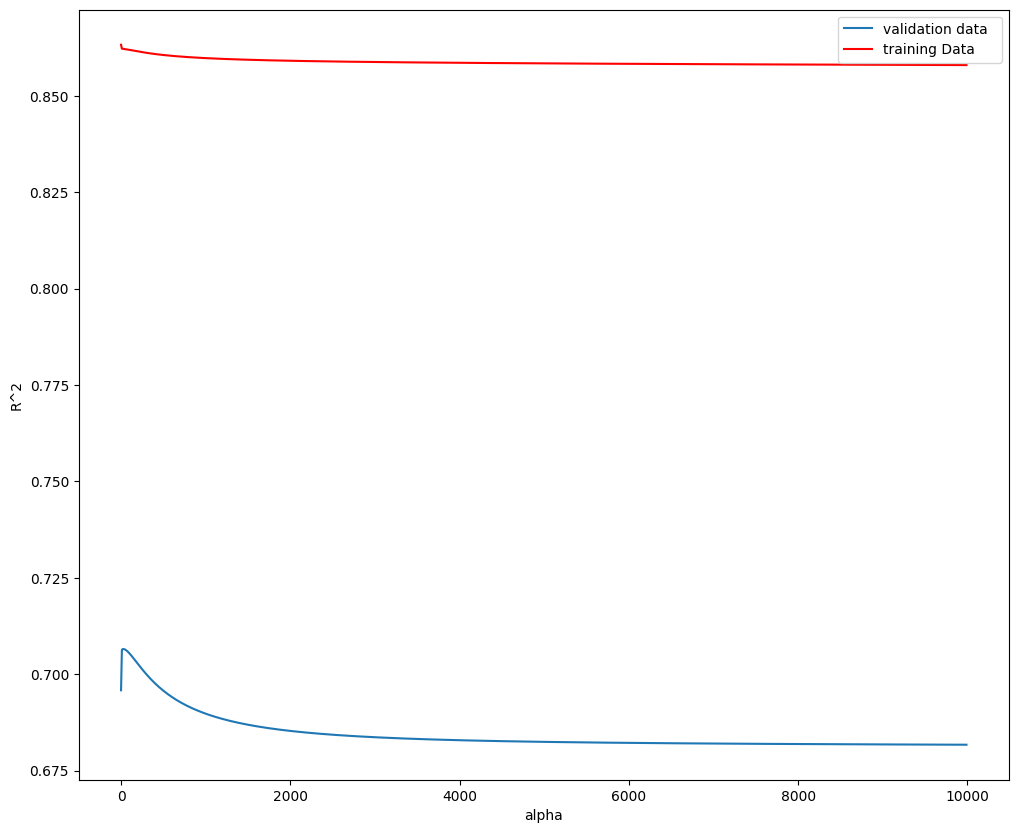

In [63]:
#plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.
Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

<h2 id="ref4">Part 4: Grid Search</h2>

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [65]:
# import <b>GridSearchCV</b> from  the module <b>model_selection</b>.
from sklearn.model_selection import GridSearchCV
#create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1
#Create a Ridge regression object:
RR=Ridge()
RR
#Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)
#Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
#The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR
# test model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6371863176346452